### CreditScore Data Set 

###### Models will be fitted
1. Logistic Regression
2. SVM
3. Random Forest
4. ElasticNet
5. Ensumble These 4 Models

In [1]:
#Import Libraries
import csv
import numpy as np
import pandas as pd

### Import Descision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Perform the necessary imports
import matplotlib.pyplot as plt
## for pearsonr correlation just feed x and y to this
from scipy.stats import pearsonr
pd.options.display.max_columns=60
#Change the Number Fromat of DATA frame
pd.options.display.float_format = '{:,.4f}'.format

In [2]:
### Load the Data
seed=42
path="C:\\Users\\fbaharkoush\\IE 598 Machine Learning\\Homework\\Group Project\\"
df_credit=pd.read_csv(path+"MLF_GP1_CreditScore.csv")
if df_credit.isnull().sum().sum()==0:
    print("No Missing Values in the dataset")

No Missing Values in the dataset


In [3]:
### Get the dummy variables of Rating and merge it with the dataset
df_credit_dummies=pd.merge(df_credit.reset_index(),
         pd.get_dummies(df_credit["Rating"]).reset_index(),
        left_on="index",right_on="index",how="left").drop("index",axis=1)

In [4]:
df_credit_dummies.head(2)

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,Free Cash Flow,Total Debt/EBITDA,Net Debt/EBITDA,Total MV,Total Debt/MV,Net Debt/MV,CFO/Debt,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd,Rating,A1,A2,A3,Aa2,Aa3,Aaa,B1,B2,B3,Ba1,Ba2,Ba3,Baa1,Baa2,Baa3,Caa1
0,-0.0055,0.0308,0.0189,0.0245,0.1468,-0.0297,-0.0193,-0.0426,0.0499,-0.1337,0.3530,-0.0477,-0.0375,0.2636,-0.2321,-0.2239,0.1012,0.0685,0.1367,0.3921,-0.1849,0.0628,0.1483,0.1004,0.1633,0.1025,1,A1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.0055,0.0308,0.0887,0.0947,0.1468,-0.0297,-0.0193,-0.0426,0.0499,-0.1337,0.3530,-0.1088,-0.0992,0.0454,-0.0719,-0.0619,0.1012,0.0685,0.2147,0.3921,-0.1849,0.0628,0.1483,-0.0896,0.1633,0.1025,1,A1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
### X and y
X=scale(df_credit_dummies.drop(['InvGrd', 'Rating'],axis=1).values)
y=df_credit_dummies["InvGrd"].values
### Train and Test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=seed)

###  PCA with Dummy Variables

In [6]:
# Create PCA instance: model
pca_model = PCA()
### Fit the Features value to PCA
pca_model.fit_transform(X)

array([[-1.15248335e-01,  3.04056439e-02, -5.73625149e-02, ...,
        -1.98683295e-03,  1.21401142e-03, -2.07682906e-15],
       [-1.06970414e-01,  4.46568712e-02, -1.00024599e-02, ...,
        -2.10264952e-03,  4.68145873e-05, -1.09291666e-15],
       [-1.00726759e-01,  4.49912941e-02,  2.03696419e-02, ...,
        -7.42464244e-04,  4.08196549e-04,  4.80258635e-15],
       ...,
       [-1.64284497e-01, -6.88637238e-01, -5.71696306e-01, ...,
        -1.00729677e-03,  1.42029979e-03,  1.05203267e-15],
       [-1.02581361e-01, -7.12270022e-01, -6.22364252e-01, ...,
         7.70699272e-04, -1.54993582e-03,  4.80073863e-16],
       [-2.14992750e-01, -6.88032028e-01, -6.28300064e-01, ...,
         2.69455000e-03, -8.46058966e-04,  9.73895010e-17]])

In [7]:
X_features=list(df_credit_dummies.drop(['InvGrd', 'Rating'],axis=1).columns)

In [8]:
df_pca_exp_var=pd.DataFrame({"Features":X_features,
              "PCA_Exp_Var":pca_model.explained_variance_ratio_}).sort_values("PCA_Exp_Var",ascending=False)
df_pca_exp_var["Cummulative Exp Var"]=df_pca_exp_var["PCA_Exp_Var"].cumsum()

##### PCA Report With Dummy Variables

In [9]:
df_pca_exp_var

,Features,PCA_Exp_Var,Cummulative Exp Var
0,Sales/Revenues,0.0936,0.0936
1,Gross Margin,0.0737,0.1673
2,EBITDA,0.0707,0.2381
3,EBITDA Margin,0.0517,0.2897
4,Net Income Before Extras,0.0495,0.3392
5,Total Debt,0.0481,0.3873
6,Net Debt,0.0372,0.4245
7,LT Debt,0.0298,0.4543
8,ST Debt,0.0288,0.4831
9,Cash,0.0282,0.5113


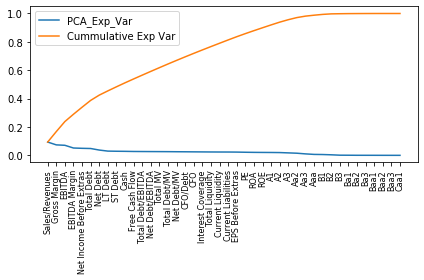

In [10]:
plotX = df_pca_exp_var.iloc[:, 0]
plotY1 = df_pca_exp_var.iloc[:, 1]
plotY2 = df_pca_exp_var.iloc[:, 2]
plt.xticks(rotation=90)
plt.plot(plotX, plotY1)
plt.plot(plotX, plotY2)
plt.legend(['PCA_Exp_Var', 'Cummulative Exp Var'])
plt.tick_params(axis='x', which='major', labelsize=8)
plt.tight_layout()

###  1.1 Logistic Regression
Target Vaiable: InvGrd with Duummy Variables

In [11]:
## Fit the Model
logReg_model=LogisticRegression(solver='lbfgs')
logReg_model.fit(X_train,y_train)
### Predict
y_pred_train=logReg_model.predict(X_train)
y_pred_test=logReg_model.predict(X_test)

In [12]:
print("Accuracy Score of Logistic Regression Model with dummy variables on Train Set",logReg_model.score(X_train,y_train))
print("Accuracy Score of Logistic Regression Model with dummy variables on Test Set",logReg_model.score(X_test,y_test))
print("ROC_AUC of Logistic Regression Model with dummy variables on Train Set",roc_auc_score(y_train,y_pred_train))
print("ROC_AUC  of Logistic Regression Model with dummy variables on Test Set",roc_auc_score(y_test,y_pred_test))

Accuracy Score of Logistic Regression Model with dummy variables on Train Set 1.0
Accuracy Score of Logistic Regression Model with dummy variables on Test Set 1.0
ROC_AUC of Logistic Regression Model with dummy variables on Train Set 1.0
ROC_AUC  of Logistic Regression Model with dummy variables on Test Set 1.0


As we noticed creating the dummy variables is boosting the model accuracy. In the following code we are going to remove "Rating" dummy variables and run the logistic regression model again and see what happens to the result.

In [13]:
list_to_drop=['InvGrd', 'Rating', 'A1', 'A2', 'A3', 'Aa2', 'Aa3', 'Aaa',
       'B1', 'B2', 'B3', 'Ba1', 'Ba2', 'Ba3', 'Baa1', 'Baa2', 'Baa3', 'Caa1']

In [14]:
X=scale(df_credit_dummies.drop(list_to_drop,axis=1).values)
y=df_credit_dummies["InvGrd"].values
### Train and Test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=seed)

In [15]:
del y_pred_train , y_pred_test

### PCA without Dummy Variables

In [16]:
# Create PCA instance: model
pca_model = PCA()
### Fit the Features value to PCA
pca_model.fit_transform(X)

array([[-0.15189997,  0.0235405 , -0.06845795, ..., -0.00784368,
        -0.00442878, -0.00160618],
       [-0.14272847,  0.03249937, -0.01855342, ..., -0.00370066,
        -0.00426299, -0.00279038],
       [-0.13566313,  0.02783463,  0.00923416, ..., -0.00908331,
        -0.00279016, -0.00242822],
       ...,
       [-0.13568104, -0.43058978, -0.44130577, ...,  0.02968121,
        -0.00582438,  0.00059085],
       [-0.0733207 , -0.4424719 , -0.4753796 , ..., -0.00732613,
        -0.00338393, -0.00238864],
       [-0.18756961, -0.4270099 , -0.50309818, ..., -0.0221842 ,
        -0.00134203, -0.00167871]])

In [17]:
X_features=list(df_credit_dummies.drop(list_to_drop,axis=1).columns)

In [18]:
df_pca_exp_var=pd.DataFrame({"Features":X_features,
              "PCA_Exp_Var":pca_model.explained_variance_ratio_}).sort_values("PCA_Exp_Var",ascending=False)
df_pca_exp_var["Cummulative Exp Var"]=df_pca_exp_var["PCA_Exp_Var"].cumsum()

##### PCA Report Without Dummy Variables

In [19]:
df_pca_exp_var

,Features,PCA_Exp_Var,Cummulative Exp Var
0,Sales/Revenues,0.1443,0.1443
1,Gross Margin,0.1185,0.2628
2,EBITDA,0.1126,0.3754
3,EBITDA Margin,0.0819,0.4573
4,Net Income Before Extras,0.0769,0.5342
5,Total Debt,0.0755,0.6097
6,Net Debt,0.0575,0.6672
7,LT Debt,0.0420,0.7092
8,ST Debt,0.0390,0.7482
9,Cash,0.0382,0.7864


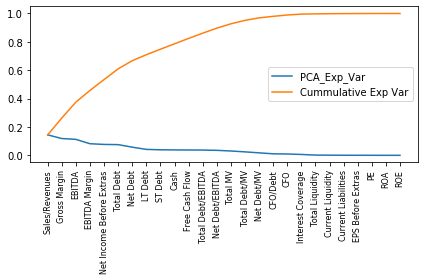

In [20]:
plotX = df_pca_exp_var.iloc[:, 0]
plotY1 = df_pca_exp_var.iloc[:, 1]
plotY2 = df_pca_exp_var.iloc[:, 2]
plt.xticks(rotation=90)
plt.plot(plotX, plotY1)
plt.plot(plotX, plotY2)
plt.legend(['PCA_Exp_Var', 'Cummulative Exp Var'])
plt.tick_params(axis='x', which='major', labelsize=8)
plt.tight_layout()

### 1.2 Logistic Regression
Target Vaiable: InvGrd without Duummy Variables

In [21]:
## Fit the Model
logReg_model=LogisticRegression(solver='lbfgs')
logReg_model.fit(X_train,y_train)
### Predict
y_pred_train=logReg_model.predict(X_train)
y_pred_test=logReg_model.predict(X_test)

In [22]:
print("Accuracy Score of Logistic Regression Model WITHOUT dummy variables on Train Set",logReg_model.score(X_train,y_train))
print("Accuracy Score of Logistic Regression Model WITHOUT dummy variables on Test Set",logReg_model.score(X_test,y_test))
print("ROC_AUC of Logistic Regression Model WITHOUT dummy variables on Train Set",roc_auc_score(y_train,y_pred_train))
print("ROC_AUC  of Logistic Regression Model WITHOUT dummy variables on Test Set",roc_auc_score(y_test,y_pred_test))

Accuracy Score of Logistic Regression Model WITHOUT dummy variables on Train Set 0.7717647058823529
Accuracy Score of Logistic Regression Model WITHOUT dummy variables on Test Set 0.7529411764705882
ROC_AUC of Logistic Regression Model WITHOUT dummy variables on Train Set 0.5353135034645935
ROC_AUC  of Logistic Regression Model WITHOUT dummy variables on Test Set 0.5291506017058067


In [23]:
df_models_summary=pd.DataFrame({"Model":["Logistic Regression"],"Accuracy Train":[logReg_model.score(X_train,y_train)],
             "Accuracy Test":[logReg_model.score(X_test,y_test)],
             "ROC Train":roc_auc_score(y_train,y_pred_train),
            "ROC Test":roc_auc_score(y_test,y_pred_test)})

In [24]:
df_models_summary

,Model,Accuracy Train,Accuracy Test,ROC Train,ROC Test
0,Logistic Regression,0.7718,0.7529,0.5353,0.5292


### Classification Report on Test Set 

In [25]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.62      0.07      0.13       108
           1       0.76      0.98      0.86       317

    accuracy                           0.75       425
   macro avg       0.69      0.53      0.49       425
weighted avg       0.72      0.75      0.67       425



In [26]:
import pandas as pd
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_pred_test, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)

In [27]:
df_confusion

Predicted,0,1
Actual,,
0,8,100
1,5,312


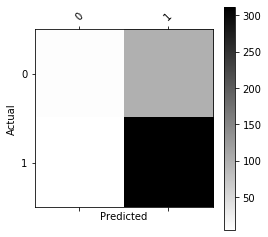

In [28]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_confusion)

###  2. Random Forest with 10 Cross Validation without dummy variables
Target Vaiable: InvGrd

In [29]:
del y_pred_train , y_pred_test , y_pred

In [30]:
### Random Forest Parameters
prameters_for_rfc={'n_estimators': [100,200,300,400,500],
          'criterion':['gini','entropy']}

In [31]:
### Initiate Random Forest Model With Max Depth=2
random_forest_classsifier_model=RandomForestClassifier(random_state=seed,max_depth=3)

### Initiate Random Forest Model with 10 Fold Cross Validation
random_forest_classsifier_model_gridcv=GridSearchCV(estimator=random_forest_classsifier_model,param_grid=prameters_for_rfc,
                                                cv=10,
                                               scoring='accuracy')

### Fit Random Forest Model with Cross Validation
random_forest_classsifier_model_gridcv.fit(X_train,y_train)

### Get the Best Score of the cross validate model
random_forest_classsifier_model_gridcv.best_score_

0.7819607843137255

In [32]:
print("Best Random Forest Model is the one with the following Parameters",random_forest_classsifier_model_gridcv.best_params_)

Best Random Forest Model is the one with the following Parameters {'criterion': 'gini', 'n_estimators': 100}


### Selecting Best Random Forest  Model 

In [33]:
random_forest_classsifier_model_with_best_param=random_forest_classsifier_model_gridcv.best_estimator_
random_forest_classsifier_model_gridcv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

#### In Sample Accuracy (Train)

In [34]:
### Fit to the best Model
random_forest_classsifier_model_with_best_param.fit(X_train,y_train)
### Training set prediction 
y_pred_train=random_forest_classsifier_model_with_best_param.predict(X_train)
### Training set ROC Score and Accuracy Score
print("ROC AUC Sccore of the best RF model on Train Set",roc_auc_score(y_train,y_pred_train))
print("Accuracy score of best RF on Train",accuracy_score(y_train,y_pred_train))

ROC AUC Sccore of the best RF model on Train Set 0.5925046476254859
Accuracy score of best RF on Train 0.8023529411764706


#### Out Sample Accuracy (Test)

In [35]:
### Test set ROC Score and Accuracy Score
y_pred_test=random_forest_classsifier_model_with_best_param.predict(X_test)
print("ROC AUC Sccore of the best RF model on Test Set",roc_auc_score(y_test,y_pred_test))
print("Accuracy score of best RF on Test",accuracy_score(y_test,y_pred_test))

ROC AUC Sccore of the best RF model on Test Set 0.5693422128753359
Accuracy score of best RF on Test 0.7764705882352941


In [36]:
pd.DataFrame({"Model":["Random Forest"],"Accuracy Train":[accuracy_score(y_train,y_pred_train)],
             "Accuracy Test":[accuracy_score(y_test,y_pred_test)],
             "ROC Train":roc_auc_score(y_train,y_pred_train),
            "ROC Test":roc_auc_score(y_test,y_pred_test)})

,Model,Accuracy Train,Accuracy Test,ROC Train,ROC Test
0,Random Forest,0.8024,0.7765,0.5925,0.5693


In [37]:
df_models_summary=pd.concat([df_models_summary,pd.DataFrame(
    {"Model":["Random Forest"],"Accuracy Train":[accuracy_score(y_train,y_pred_train)],
             "Accuracy Test":[accuracy_score(y_test,y_pred_test)],
             "ROC Train":roc_auc_score(y_train,y_pred_train),
            "ROC Test":roc_auc_score(y_test,y_pred_test)})])

In [38]:
random_forest_classsifier_model_with_best_param.feature_importances_

array([0.06977861, 0.05635957, 0.07123801, 0.03276124, 0.04432367,
       0.00851944, 0.01474779, 0.00761444, 0.008769  , 0.04213864,
       0.06794936, 0.02860935, 0.01448993, 0.05124046, 0.02644558,
       0.01713333, 0.06076943, 0.07945242, 0.00880084, 0.00610081,
       0.03229257, 0.00272128, 0.05465327, 0.06158875, 0.07671441,
       0.0547878 ])

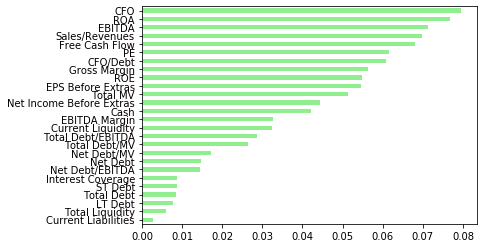

In [39]:
importances_rf=pd.Series(random_forest_classsifier_model_with_best_param.feature_importances_,
          index = X_features)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='lightgreen')
plt.show()

### 3. SVM
Target Vaiable: InvGrd
1. kernel='linear'
2. kernel='rbf

In [40]:
del y_pred_train , y_pred_test

In [41]:
### Linear SVM
svm_linear_classification=svm.SVC(C=1,gamma='scale',kernel='linear')
svm_linear_classification.fit(X_train,y_train)

### Linear SVM Prediction
y_pred_train=svm_linear_classification.predict(X_train)
y_pred_test=svm_linear_classification.predict(X_test)

In [42]:
print("Accuracy Score of Linear SVM Model WITHOUT dummy variables on Train Set",
      svm_linear_classification.score(X_train,y_train))

print("Accuracy Score of Linear SVM Model WITHOUT dummy variables on Test Set",
      svm_linear_classification.score(X_test,y_test))

print("ROC_AUC of Linear SVM Model WITHOUT dummy variables on Train Set",
      roc_auc_score(y_train,y_pred_train))

print("ROC_AUC  of Linear SVM Model WITHOUT dummy variables on Test Set",
      roc_auc_score(y_test,y_pred_test))

Accuracy Score of Linear SVM Model WITHOUT dummy variables on Train Set 0.7686274509803922
Accuracy Score of Linear SVM Model WITHOUT dummy variables on Test Set 0.7482352941176471
ROC_AUC of Linear SVM Model WITHOUT dummy variables on Train Set 0.5175173229677201
ROC_AUC  of Linear SVM Model WITHOUT dummy variables on Test Set 0.5076819721930131


In [43]:
### Models Summary
df_models_summary=pd.concat([df_models_summary,pd.DataFrame({"Model":["SVM Linear"],"Accuracy Train":[svm_linear_classification.score(X_train,y_train)],
             "Accuracy Test":[svm_linear_classification.score(X_test,y_test)],
             "ROC Train":roc_auc_score(y_train,y_pred_train),
            "ROC Test":roc_auc_score(y_test,y_pred_test)})])

In [44]:
del y_pred_train , y_pred_test

In [45]:
### RBF SVM
svm_rfb_classification=svm.SVC(C=2,gamma='scale',kernel='rbf')
svm_rfb_classification.fit(X_train,y_train)

### RBF SVM prediction
y_pred_train=svm_rfb_classification.predict(X_train)
y_pred_test=svm_rfb_classification.predict(X_test)

In [46]:
print("Accuracy Score of RBF SVM Model WITHOUT dummy variables on Train Set",
      svm_rfb_classification.score(X_train,y_train))

print("Accuracy Score of RBF SVM Model WITHOUT dummy variables on Test Set",
      svm_rfb_classification.score(X_test,y_test))

print("ROC_AUC of RBF SVM Model WITHOUT dummy variables on Train Set",
      roc_auc_score(y_train,y_pred_train))

print("ROC_AUC of RBF SVM Model WITHOUT dummy variables on Test Set",
      roc_auc_score(y_test,y_pred_test))

Accuracy Score of RBF SVM Model WITHOUT dummy variables on Train Set 0.8258823529411765
Accuracy Score of RBF SVM Model WITHOUT dummy variables on Test Set 0.7623529411764706
ROC_AUC of RBF SVM Model WITHOUT dummy variables on Train Set 0.6439327361838769
ROC_AUC of RBF SVM Model WITHOUT dummy variables on Test Set 0.5629308330412431


In [47]:
df_models_summary=pd.concat([df_models_summary,pd.DataFrame({"Model":["SVM RFB"],
                                           "Accuracy Train":[svm_rfb_classification.score(X_train,y_train)],
             "Accuracy Test":[svm_rfb_classification.score(X_test,y_test)],
             "ROC Train":roc_auc_score(y_train,y_pred_train),
            "ROC Test":roc_auc_score(y_test,y_pred_test)})])

### Ensumbling for InvGrd
##### 4 Models were fitted for InvGrd  as Target Variable

In [48]:
### Linear SVM
svm_linear_classification=svm.SVC(C=1,gamma='scale',kernel='linear')
### RBF SVM
svm_rfb_classification=svm.SVC(C=2,gamma='scale',kernel='rbf')
## Logistic Regression
logReg_model=LogisticRegression(solver='lbfgs')

### Define a list called Classifier that contains the tuples of Instantiatd models
classifiers=[("Logistic Regression", logReg_model),
            ('SVM RBF', svm_rfb_classification),
            ("SVM Linear",svm_linear_classification),
            ("Decision Tree Classifier",random_forest_classsifier_model_gridcv.best_estimator_)]

In [49]:
### Iterate over the difined list of tuple containing the classifiers
for clf_nam, clf in classifiers:
    ### Fit clt to the traning set
    clf.fit(X_train,y_train)
    ### Predict test
    y_pred_test=clf.predict(X_test)
    ### Evaluate the accuracy of the clf on the test set
    print((clf_nam,accuracy_score(y_test,y_pred_test)))

('Logistic Regression', 0.7529411764705882)
('SVM RBF', 0.7623529411764706)
('SVM Linear', 0.7482352941176471)
('Decision Tree Classifier', 0.7764705882352941)


In [50]:
### Instatitate a VotingClassifier 'vc'
vc=VotingClassifier(estimators=classifiers)
### Fit the VotingClassifier
vc.fit(X_train,y_train)
y_pred_train=vc.predict(X_train)
y_pred_test=vc.predict(X_test)
print("Accuracy of Voting Classifier Ensumbled Train", vc.score(X_train,y_train))
print("Accuracy of Voting Classifier Ensumbled Test", vc.score(X_test,y_test))

Accuracy of Voting Classifier Ensumbled Train 0.8023529411764706
Accuracy of Voting Classifier Ensumbled Test 0.7670588235294118


In [51]:
df_models_summary=pd.concat([df_models_summary,pd.DataFrame({"Model":["Voting Classifier Ensumbled"],
                                           "Accuracy Train":[vc.score(X_train,y_train)],
             "Accuracy Test":[vc.score(X_test,y_test)],
             "ROC Train":[roc_auc_score(y_train,y_pred_train)],
            "ROC Test":[roc_auc_score(y_test,y_pred_test)]})])
           

In [52]:
df_models_summary

,Model,Accuracy Train,Accuracy Test,ROC Train,ROC Test
0,Logistic Regression,0.7718,0.7529,0.5353,0.5292
0,Random Forest,0.8024,0.7765,0.5925,0.5693
0,SVM Linear,0.7686,0.7482,0.5175,0.5077
0,SVM RFB,0.8259,0.7624,0.6439,0.5629
0,Voting Classifier Ensumbled,0.8024,0.7671,0.5880,0.5539


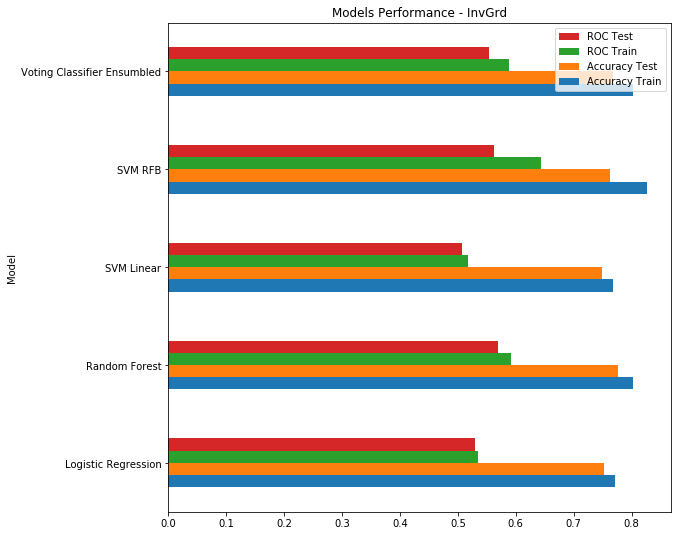

In [53]:
df_models_summary.plot("Model",kind='barh',title="Models Performance - InvGrd",figsize=(9,9),legend='reverse')

### Conclusion 

### 1 Logistic Regression
Target Vaiable: Rating

In [54]:
del X_train,X_test,y_train, y_test , y_pred_test, y_pred_train , logReg_model

In [55]:
y=df_credit["Rating"].values
### Train and Test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=seed)

In [56]:
## Fit the Model
logReg_model=LogisticRegression(solver='newton-cg',multi_class ='multinomial')
logReg_model.fit(X_train,y_train)
### Predict
y_pred_train=logReg_model.predict(X_train)
y_pred_test=logReg_model.predict(X_test)

In [57]:
print("Accuracy Score of Logistic Regression Model WITHOUT dummy variables on Train Set",logReg_model.score(X_train,y_train))
print("Accuracy Score of Logistic Regression Model WITHOUT dummy variables on Test Set",logReg_model.score(X_test,y_test))

Accuracy Score of Logistic Regression Model WITHOUT dummy variables on Train Set 0.2627450980392157
Accuracy Score of Logistic Regression Model WITHOUT dummy variables on Test Set 0.2023529411764706


In [58]:
#logReg_model.score(X_test,y_test)
df_models_summary_rating=pd.DataFrame({"Model":"Logistic Regression",
              "Train Accuracy Score":[logReg_model.score(X_train,y_train)],
             "Test Accuracy Score":[logReg_model.score(X_train,y_train)]})

### 2 Random Forest
Target Vaiable: Rating

In [59]:
del  y_pred_test, y_pred_train

In [60]:
del random_forest_classsifier_model_gridcv, random_forest_classsifier_model

In [61]:
### Random Forest Parameters
prameters_for_rfc={'n_estimators': [100,200,300,400,500],
          'criterion':['gini','entropy'],
                  'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14]}

In [62]:
### Initiate Random Forest Model With Max Depth=2
random_forest_classsifier_model=RandomForestClassifier(random_state=seed)

### Initiate Random Forest Model with 10 Fold Cross Validation
random_forest_classsifier_model_gridcv=GridSearchCV(estimator=random_forest_classsifier_model,param_grid=prameters_for_rfc,
                                                cv=2,iid=False,
                                               scoring='accuracy')

### Fit Random Forest Model with Cross Validation
random_forest_classsifier_model_gridcv.fit(X_train,y_train)

### Get the Best Score of the cross validate model
random_forest_classsifier_model_gridcv.best_score_

0.48464144926252384

In [63]:
print("Best Random Forest Model is the one with the following Parameters\n",
      random_forest_classsifier_model_gridcv.best_params_)

Best Random Forest Model is the one with the following Parameters
 {'criterion': 'entropy', 'max_depth': 14, 'n_estimators': 500}


### Selecting best Random Forest model 

In [64]:
random_forest_classsifier_model_with_best_param=random_forest_classsifier_model_gridcv.best_estimator_
random_forest_classsifier_model_gridcv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=14, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

#### In Sample Accuracy (Train)

In [65]:
### Fit to the best Model
random_forest_classsifier_model_with_best_param.fit(X_train,y_train)
### Training set prediction 
y_pred_train=random_forest_classsifier_model_with_best_param.predict(X_train)
### Training set ROC Score 
print("Accuracy Sccore of the best model on Training Set",
      random_forest_classsifier_model_with_best_param.score(X_train,y_train))

Accuracy Sccore of the best model on Training Set 1.0


#### Out Sample Accuracy (Test)

In [66]:
y_pred_test=random_forest_classsifier_model_with_best_param.predict(X_test)
print("Accuracy Score of the best model on Test Set",
      random_forest_classsifier_model_with_best_param.score(X_test,y_test))

Accuracy Score of the best model on Test Set 0.6447058823529411


In [67]:
df_models_summary_rating=pd.concat([df_models_summary_rating,pd.DataFrame({"Model":"Random Forest",
              "Train Accuracy Score":[random_forest_classsifier_model_with_best_param.score(X_train,y_train)],
             "Test Accuracy Score":[random_forest_classsifier_model_with_best_param.score(X_test,y_test)]})])

### Are we overfitting? 

It seems we may be overfitting the model by selecting high number of max depth (more than 10) for the trees and the big diffrence between in sample accuracy vs out of sample accuracy. So we are investiating that here below

##### Random Models Fitted Preformance

In [68]:
df_models_summary_rating_rf=pd.merge(pd.DataFrame(random_forest_classsifier_model_gridcv.cv_results_['params']).reset_index(),
         pd.DataFrame({"mean_test_score":(list(
    random_forest_classsifier_model_gridcv.cv_results_['mean_test_score']))}).reset_index(),
         left_on="index",right_on="index",how="left").drop("index",axis=1)
df_models_summary_rating_rf["Model"]="Random Forest"

In [69]:
df_models_summary_rating_rf.head(2)

,criterion,max_depth,n_estimators,mean_test_score,Model
0,gini,1,100,0.1945,Random Forest
1,gini,1,200,0.1961,Random Forest


In [70]:
list_of_train_score=[]
for cir, depth, n_tree in zip(
    list(df_models_summary_rating_rf["criterion"]),
    list(df_models_summary_rating_rf["max_depth"]),
   list(df_models_summary_rating_rf["n_estimators"])):
    dt=RandomForestClassifier(random_state=seed,criterion=cir,
                          max_depth=depth,n_estimators=n_tree,)
    dt.fit(X_train,y_train)
    list_of_train_score.append(dt.score(X_train,y_train))

In [71]:
df_models_summary_rating_rf["Train Accuracy Score"]=list_of_train_score

In [72]:
df_models_summary_rating_rf.sort_values(["mean_test_score"],ascending=False).head()

,criterion,max_depth,n_estimators,mean_test_score,Model,Train Accuracy Score
139,entropy,14,500,0.4846,Random Forest,1.0000
134,entropy,13,500,0.4807,Random Forest,0.9992
69,gini,14,500,0.4799,Random Forest,0.9984
64,gini,13,500,0.4776,Random Forest,0.9929
133,entropy,13,400,0.4768,Random Forest,0.9992


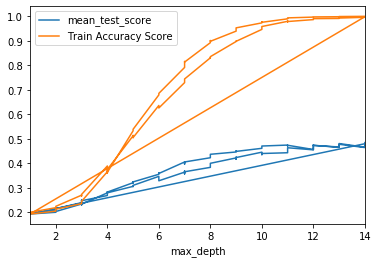

In [73]:
df_models_summary_rating_rf.plot(y=["mean_test_score","Train Accuracy Score"],x="max_depth")

Our analysis shows its the nature of the data that requiers lagre number of max depth for improvment and we are not overfitting as we the accurcy of the train and test are increasing together as the number of max depth are growing.

### SVM
Target Vaiable: Rating

In [74]:
del y_pred_train , y_pred_test

In [75]:
### RBF SVM
svm_classification=svm.SVC(gamma='auto')

In [76]:
### RBF Parameters
prameters_for_SVM={'C':range(1,10),
          'kernel':['rbf','linear']}
### Fit the model 
svm_classification_gridcv=GridSearchCV(estimator=svm_classification,param_grid=prameters_for_SVM,
                                                cv=2,
                                               scoring='accuracy')
svm_classification_gridcv.fit(X_train,y_train)
print("Best SVM Model is",svm_classification_gridcv.best_estimator_)

Best SVM Model is SVC(C=9, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [77]:
df_models_summary_rating=pd.concat([df_models_summary_rating,pd.DataFrame({"Model":"SVM",
              "Train Accuracy Score":[svm_classification_gridcv.score(X_train,y_train)],
             "Test Accuracy Score":[svm_classification_gridcv.score(X_test,y_test)]})])

In [78]:
df_models_summary_rating

,Model,Train Accuracy Score,Test Accuracy Score
0,Logistic Regression,0.2627,0.2627
0,Random Forest,1.0000,0.6447
0,SVM,0.4235,0.2800


### Ensumbling for Rating
##### 3 Models were fitted for Rating as  Target Variable

In [79]:
### Define a list called Classifier that contains the tuples of Instantiatd models
logReg_model=LogisticRegression(solver='newton-cg',multi_class ='multinomial')
classifiers=[("Logistic Regression", logReg_model),
            ("SVM Classification",svm_classification_gridcv.best_estimator_),
            ("Decision Tree Classifier",random_forest_classsifier_model_gridcv.best_estimator_)]

In [80]:
### Iterate over the difined list of tuple containing the classifiers
for clf_nam, clf in classifiers:
    ### Fit clt to the traning set
    clf.fit(X_train,y_train)
    ### Predict test
    y_pred_test=clf.predict(X_test)
    ### Evaluate the accuracy of the clf on the test set
    print((clf_nam,accuracy_score(y_test,y_pred_test)))

('Logistic Regression', 0.2023529411764706)
('SVM Classification', 0.28)
('Decision Tree Classifier', 0.6447058823529411)


In [81]:
### Instatitate a VotingClassifier 'vc'
vc=VotingClassifier(estimators=classifiers)
### Fit the VotingClassifier
vc.fit(X_train,y_train)
y_pred_train=vc.predict(X_train)
y_pred_test=vc.predict(X_test)
print("Accuracy of Voting Classifier Ensumbled Rating Train", vc.score(X_train,y_train))
print("Accuracy of Voting Classifier Ensumbled Rating Test", vc.score(X_test,y_test))

Accuracy of Voting Classifier Ensumbled Rating Train 0.6603921568627451
Accuracy of Voting Classifier Ensumbled Rating Test 0.4211764705882353


In [86]:
df_models_summary_rating=pd.concat([df_models_summary_rating,pd.DataFrame({"Model":["Voting Classifier Ensumbled Rating"],
                                           "Train Accuracy Score":[vc.score(X_train,y_train)],
             "Test Accuracy Score":[vc.score(X_test,y_test)]})],sort=False)
df_models_summary_rating

,Model,Train Accuracy Score,Test Accuracy Score
0,Logistic Regression,0.2627,0.2627
0,Random Forest,1.0000,0.6447
0,SVM,0.4235,0.2800
0,Voting Classifier Ensumbled Rating,0.6604,0.4212


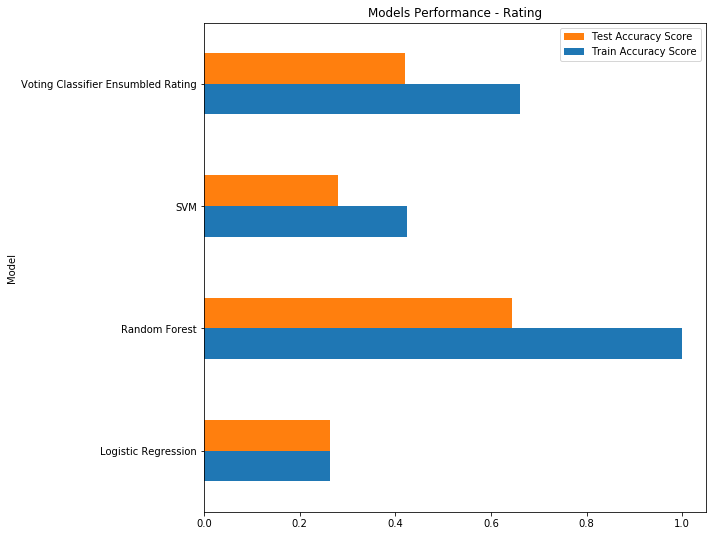

In [87]:
df_models_summary_rating.plot("Model",kind='barh',title="Models Performance - Rating",figsize=(9,9),legend='reverse')